## TO DO
Just create a simple linear regression model to see how well that does as a baseline benchmark \
Also use Ridge and Lasso to figure out if any of the features aren't as useful

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
SPARCS_df = pd.read_csv('./Hospital_Inpatient_Discharges__SPARCS_De-Identified___Cost_Transparency__Beginning_2009_20250419.csv')
SPARCS_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Year', 'Facility Id', 'Facility Name',
       'APR DRG Code', 'APR Severity of Illness Code', 'APR DRG Description',
       'APR Severity of Illness Description', 'APR Medical Surgical Code',
       'APR Medical Surgical Description', 'Discharges', 'Mean Charge',
       'Median Charge', 'Mean Cost', 'Median Cost',
       'APR DRG Description Clean', 'DRG_Cluster_Label', 'Facility City',
       'Facility City Grouped'],
      dtype='object')

### prepare data to be fed into model

In [24]:
X = SPARCS_df[[
    'DRG_Cluster_Label',
    'Facility City Grouped',
    'APR Severity of Illness Description',
    'APR Medical Surgical Description'
]]
y = SPARCS_df['Mean Charge']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Create the pre processing pipeline

In [31]:
# Categorical columns
categorical_cols = X.columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline with linear regression
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


Define what I need

In [28]:
# Define models
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

# Store results
metrics = {}
coefs = {}

Fit each model and extract weights

In [32]:
# Fit model
pipe.fit(X_train, y_train)

# Get feature names
onehot = pipe.named_steps['preprocessor'].named_transformers_['cat']
feature_names = onehot.get_feature_names_out(categorical_cols)

# Get coefficients
coefficients = pipe.named_steps['regressor'].coef_
coef_series = pd.Series(coefficients, index=feature_names)


Visualize results

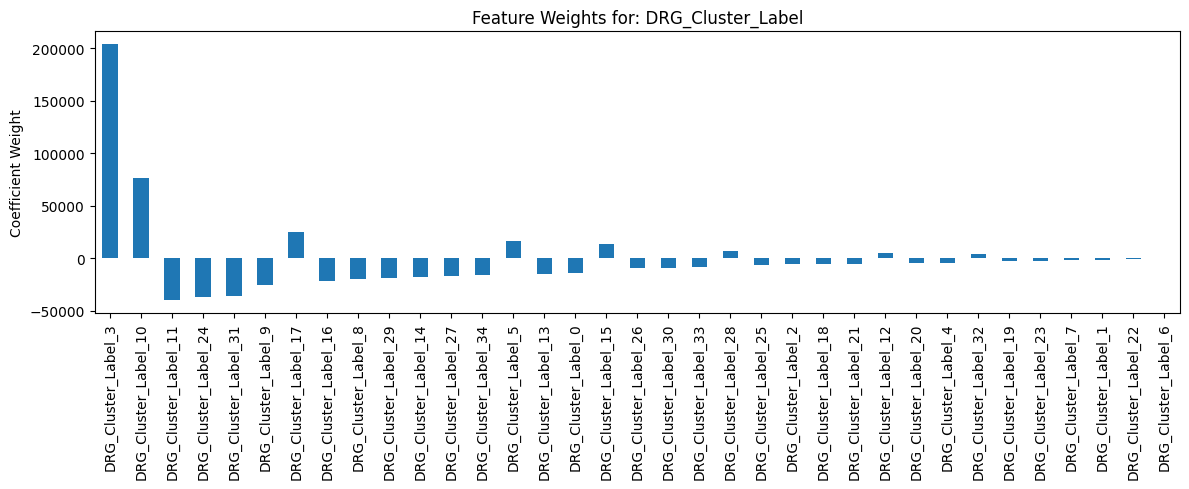

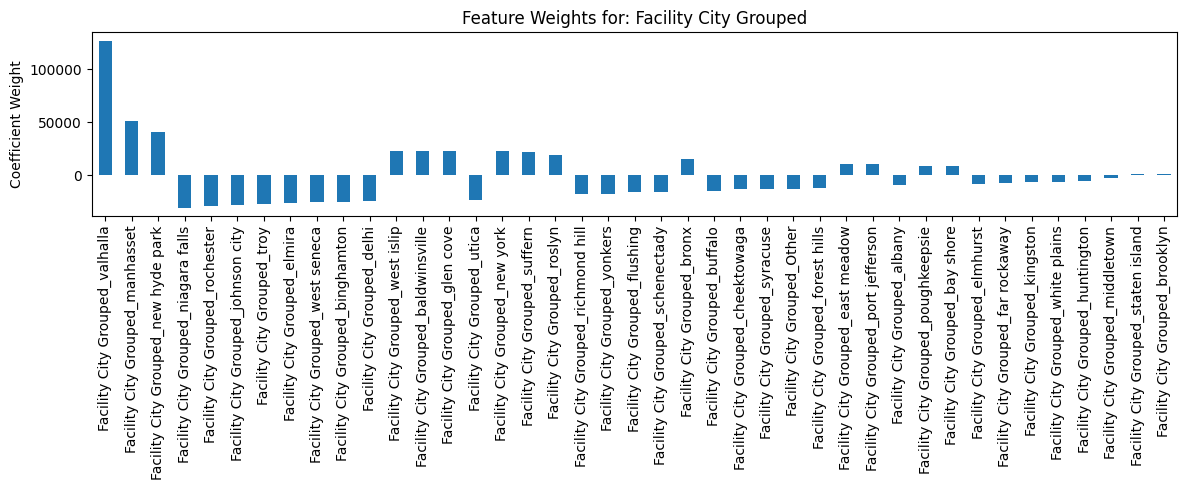

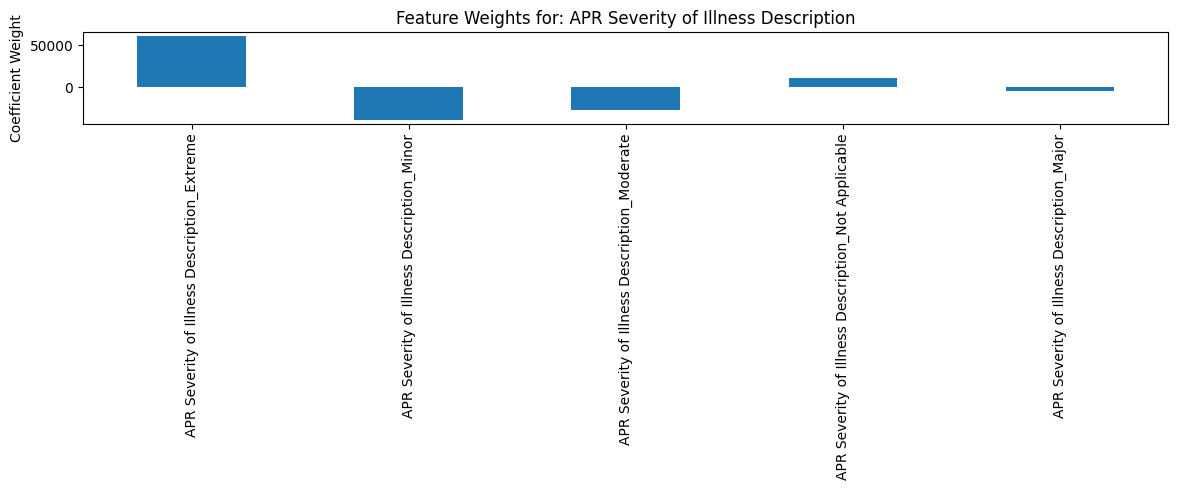

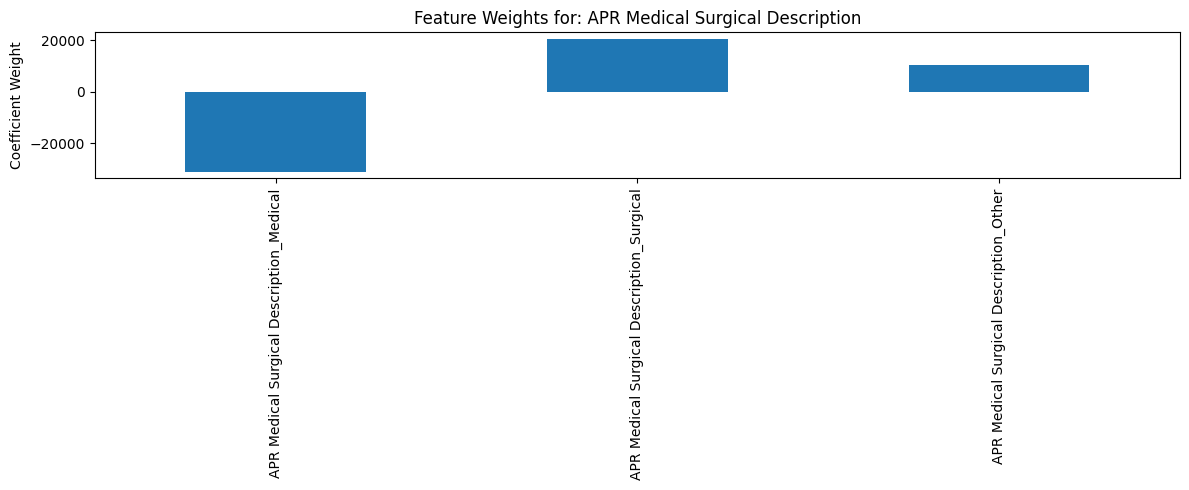

In [33]:

# --- Group and plot by original column ---
def plot_grouped_feature_weights(coefs, original_col_name):
    group_features = [f for f in coefs.index if f.startswith(original_col_name)]
    coefs_subset = coefs[group_features].sort_values(key=np.abs, ascending=False)

    plt.figure(figsize=(12, 5))
    coefs_subset.plot(kind='bar')
    plt.title(f'Feature Weights for: {original_col_name}')
    plt.ylabel('Coefficient Weight')
    plt.tight_layout()
    plt.show()

# Plot for each group
for col in categorical_cols:
    plot_grouped_feature_weights(coef_series, col)